# Automating administrative workflows

In [28]:
from arcgis.gis import *
from getpass import getpass

In [29]:
password = getpass()
gis = GIS("https://esriwebgis.webgistesting.net/portal", "admin", password)

········


## Querying for users

In [30]:
gis.users.search()

[<User username:admin>,
 <User username:Alexander.Mogollon>,
 <User username:atma.mani>,
 <User username:bat.man>,
 <User username:Burt.McAlpine>,
 <User username:Christina.Kellum>,
 <User username:Cynthia.Davis>,
 <User username:David.Mutibul>,
 <User username:David.Pastizzo>,
 <User username:Derek.Hoshijo>,
 <User username:Ellie.Maclin>,
 <User username:esri_boundaries>,
 <User username:esri_demographics>,
 <User username:esri_livingatlas>,
 <User username:esri_nav>,
 <User username:Heinrich.Langenhoven>,
 <User username:Hunter.Allen>,
 <User username:Jeremy.Fontenault>,
 <User username:Kalyana.Nissankarao>,
 <User username:Kanne.Ikwuezunma>,
 <User username:Kanne.Ikwuezunma4>,
 <User username:Mathias.Gieser>,
 <User username:Nathan.Heick>,
 <User username:Paul.Haakma>,
 <User username:Rajaram.Gudipudi>,
 <User username:Samuel.Valdez>,
 <User username:Shaunak.Vairagare>,
 <User username:Stacia.Taggart>,
 <User username:Stan.Shelton>,
 <User username:Timothy.Zimmer>,
 <User username:V

In [32]:
#filter users
gis.users.search("at*")

[<User username:atma.mani>]

In [33]:
#filter users
gis.users.search("rohit")

[]

### Create a new user

In [34]:
rohit = gis.users.create(username = 'rohit.singh', password='8#a7m1kQ?:!', 
                 firstname='Rohit', lastname='Singh',
                 email='rsingh@esri.com', role='org_user')

rohit

<User username:rohit.singh>

In [35]:
type(rohit)

arcgis.gis.User

In [36]:
rohit.update(thumbnail='rohit_thumbnail.png')

True

<User username:rohit.singh>
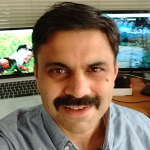

In [37]:
rohit

## Searching for groups

In [38]:
gis.groups.search()

[<Group title:"Basemaps" owner:admin>,
 <Group title:"Central Services" owner:admin>,
 <Group title:"Crime analysis" owner:admin>,
 <Group title:"Esri Boundary Layers" owner:esri_boundaries>,
 <Group title:"Esri Demographic Layers" owner:esri_demographics>,
 <Group title:"Living Atlas" owner:esri_livingatlas>,
 <Group title:"Living Atlas Analysis Layers" owner:esri_livingatlas>,
 <Group title:"Navigator Maps" owner:esri_nav>,
 <Group title:"Recreational Geocaching" owner:Stan.Shelton>,
 <Group title:"Recreational geocaching" owner:Samuel.Valdez>,
 <Group title:"Recreational geocaching SV" owner:Samuel.Valdez>]

In [40]:
#create groups
group_summary = 'A group to share data related to crime and analyze them'
group_description = 'Analysis, visualization, modeling of crime and crime related datasets using GIS'

crime_group = gis.groups.create(title='Crime analysis1', tags='crime, machine learning, clustering', 
                      description=group_description,
                      snippet=group_summary,
                     thumbnail='crime_analysis_group.png')

<Group title:"Crime analysis1" owner:admin>
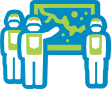

In [41]:
crime_group

## Add user to a group

In [42]:
crime_group.add_users(['rohit.singh'])

{'notAdded': []}

## Removing users

<User username:bat.man>
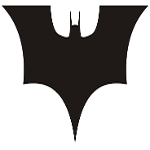

In [43]:
batman = gis.users.search('bat.man')[0]
batman

In [48]:
batman.delete(reassign_to='rohit.singh')

True

In [45]:
batman.items()

[<Item title:"gotham_crime" type:CSV owner:bat.man>]

In [46]:
batman.groups

[]

In [47]:
item = batman.items()[0]

In [ ]:
item.reassign_to('')

## Rohit's contents

In [51]:
rohit.items(folder='bat.man_root')

[<Item title:"gotham_crime" type:CSV owner:rohit.singh>]

In [50]:
rohit.folders

[{'created': 1489180722639,
  'id': 'b6097c44d13646389b326d3ee6b9e90b',
  'title': 'bat.man_root',
  'username': 'rohit.singh'}]